In [1]:
 '''
Author information:
Joey R. Muffoletto
University of Texas at Austin
Autonomous Systems Group
jrmuff@utexas.edu
'''

'\nAuthor information:\nJoey R. Muffoletto\nUniversity of Texas at Austin\nAutonomous Systems Group\njrmuff@utexas.edu\n'

In [2]:
import os

import realtime_manager as rm 
import graph_manager as gm
import reworked_graph as rg
import copy

# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

In [3]:
'''
manager configurations

traffic test globals
'''
NUM_TOWERS = 5
TAU_MAX = 5
TAU = 0

LOW_TRAFFIC_MULTIPLIER = 1
HIGH_TRAFFIC_MULTIPLIER = 2

MIN_LOW_TRAFFIC = 0
MAX_LOW_TRAFFIC = LOW_TRAFFIC_MULTIPLIER * NUM_TOWERS

MIN_HIGH_TRAFFIC = MAX_LOW_TRAFFIC
MAX_HIGH_TRAFFIC = HIGH_TRAFFIC_MULTIPLIER * NUM_TOWERS

MIN_TTL = 0
MAX_TTL = 3

DEFAULT_EMPTY_STATE = rg.State((),(),{"0" : 6})
rm.configure_realtime(tau=TAU, override_default_empty_state=DEFAULT_EMPTY_STATE)

HIGH_TRAFFIC_FREQUENCY = .20 # use rand.random() = [0.0, 1.0], or, just add this value until = 1 then reset

NUM_TIME_STEPS = 40



In [4]:
'''
Input generation functions

low traffic is some random number between min_low_traffic and max_low_traffic, high traffic is the same with high

choose a random tower index everytime we add one

high traffic occurs everytime HIGH_TRAFFIC_FREQUENCY * TIME_STEPS is a whole number

TTL is a random number between MIN_TTL and MAX_TTL
'''
import random
random.seed(10)
def generate_traffic(min_traffic, max_traffic):
    additional_requests_dict = dict()
#     counter = 0
    requests_to_add = random.randint(min_traffic, max_traffic)
    for i in range(requests_to_add):
#         if counter == NUM_TOWERS:
#             counter = 0
#         tower_to_add_to = counter
#         counter+=1
        tower_to_add_to = random.randint(0, NUM_TOWERS-1) # NUM_TOWERS is OOB
        request_to_add = ('no_pref', random.randint(MIN_TTL, MAX_TTL))
#         request_to_add = ('no_pref', 5)
        if tower_to_add_to in additional_requests_dict:
            additional_requests_dict[tower_to_add_to].append(request_to_add)
        else:
            additional_requests_dict[tower_to_add_to] = [request_to_add]
    return additional_requests_dict
            
def generate_low_traffic():
    return generate_traffic(MIN_LOW_TRAFFIC, MAX_LOW_TRAFFIC)
    
def generate_high_traffic():
    return generate_traffic(MIN_HIGH_TRAFFIC, MAX_HIGH_TRAFFIC)

In [5]:
'''
Input Generation
'''
input = []
high_traffic_counter = 0
for time in range(NUM_TIME_STEPS):
    if high_traffic_counter == 1:
        high_traffic_counter = 0
        input.append([generate_high_traffic()])
    else:
        high_traffic_counter += HIGH_TRAFFIC_FREQUENCY
        input.append([generate_low_traffic()])
        
initial_system = [copy.deepcopy(gm.return_tower(0, 1, [],[6])) for i in range(NUM_TOWERS)]

In [6]:
'''
Input statistics:
'''
requests_per_tower = [0 for i in range(NUM_TOWERS)]
for time_step in range(len(input)):
    for i in range(NUM_TOWERS):
        if i in input[time_step][0]:
            requests_per_tower[i]+=len(input[time_step][0][i])
for i in range(NUM_TOWERS):
    print("tower " + str(i) + "has " + str(requests_per_tower[i]) + " requests")

tower 0has 22 requests
tower 1has 22 requests
tower 2has 24 requests
tower 3has 39 requests
tower 4has 28 requests


In [7]:
'''
INPUT SAVING (DO NOT RE-RUN WILLY NILLY MY FRIEND)
'''
input_copy = copy.deepcopy(input)
# for _dict in input_copy:
#     print(_dict)

initial_system_copy = copy.deepcopy(initial_system)

In [8]:
'''
data collection
'''
_completed_states_per_tau = [[] for i in range(TAU_MAX)]
_timing_info_per_tau = [[] for i in range(TAU_MAX)]
for _tau in range(TAU_MAX):
    rm.configure_realtime(tau=_tau, override_default_empty_state=DEFAULT_EMPTY_STATE)
    traces, timings = rm.main_loop(initial_system_copy, copy.deepcopy(input_copy))
    _completed_states_per_tau[_tau] = copy.deepcopy(traces)
    _timing_info_per_tau[_tau] = copy.deepcopy(timings)
    gm.reset_globals()
#     print(traces)
    # _completed_states, _timing_info = rm.main_loop(initial_system_copy, input_copy)


additional requests for tower 0 = [('no_pref', 3)]
[('no_pref', 3)]
additional requests for tower 1 = [('no_pref', 3)]
[('no_pref', 3)]
additional requests for tower 3 = [('no_pref', 0), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 2)]
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [0, 2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowes

Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.07071606000044994
	round 0 breakdown :: 
	 tower 0 took 0.0034541610002634116 to find most expensive request and took 0.0046942219996708445 to sy

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.07421097299993562
	round 0 breakdown :: 
	 tower 0 took 0.0019508220002535381 to find most expensive request and took 0.00804227600019658 to synthesize with published request
	 tower 1 took 0.0035699159998330288 to find most expensive request and took 0.010858952001399302 to synthesize with published request
	 tower 2 took 0.003552094000042416 to find most expensive request and took 0.010593637000056333 to synthesize with published request
	 tower 3 took 0.004365074000816094 to find most expensive request and took 0.01927795099982177 to synthesize with published request
	 tower 4 took 5.5289992815232836e-06 

	 tower 4 took 0.0038482949994431692 to find most expensive request and took 0.011378199000319 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0016953509993982152 ,published request synthesis cumulative : 0.004634844000065641
tower 1 expensive request cumulative : 0.0016204940002353396 ,published request synthesis cumulative : 0.01004333599939855
tower 2 expensive request cumulative : 0.0017405380003765458 ,published request synthesis cumulative : 0.010265958000672981
tower 3 expensive request cumulative : 0.006698874999528925 ,published request synthesis cumulative : 0.01798479399894859
tower 4 expensive request cumulative : 0.0038482949994431692 ,published request synthesis cumulative : 0.011378199000319
end of system
---
Full trace including new requests = [State currently has requests :: () Time states of :: () Port states of :: {'0': 4} Labels :: ('VALID', 'FINISH')  
]
Full trace including new requests = [

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.07031728000038129
	round 0 breakdown :: 
	 tower 0 took 3.5740999919653405e-05 to find most expensive request and took 0.0081243849999737 t

Tower's current cost = [3, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index 0
lowest_new_cost [0, 2]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.0596011070001623
	round 0 breakdown :: 
	 tower 0 took 0.0016902660008781822 to find most expensive request and took 0.002183694999985164 to synthesize with published request
	 tower 1 took 0.025639436999881582 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.008386725999116607 to find most expensive request and took 0.007437921000018832 to synthesize with published request
	 tower 3 took 5.840799985890044e-05 to find most expensive request and took 0.006236601000637165 to

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.10018042699994112
	round 0 breakdown :: 
	 tower 0 took

accepting tower index 0
lowest_new_cost [0, 2]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.033206097000402224
	round 0 breakdown :: 
	 tower 0 took 0.001588402000379574 to find most expensive request and took 0.0020649429998229607 to synthesize with published request
	 tower 1 took 0.0016679179998391191 to find most expensive request and took 0.0027241039997534244 to synthesize with published request
	 tower 2 took 6.051000127627049e-06 to find most expensive request and took 0.0030952130000514444 to synthesize with published request
	 tower 3 took 0.009929038999871409 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 4 took 0.006325203999949736 to find most expensive request and took 0.00465598300070269 to synthesize with published request

Tower has requests :: ['wrong_tower'] and times of [2] and ports of {'0': 5}
Tower has requests :: () and times of () and ports of {

accepting tower index 1
lowest_new_cost [0, 2]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.04918644300050801
	round 1 breakdown :: 
	 tower 0 took 3.064000338781625e-06 to find most expensive request and took 0.017034309999871766 to synthesize with published request
	 tower 1 took 3.602800006774487e-05 to find most expensive request and took 0.0028346080007395358 to synthesize with published request
	 tower 2 took 3.735000063898042e-06 to find most expensive request and took 0.0032702259995858185 to synthesize with published request
	 tower 3 took 0.019360212999345094 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 4 took 2.677999873412773e-06 to find most expensive request and took 0.005414955999185622 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [3, 2, 1, 3] and ports of {'0': 4}
Tower has reques

accepting tower index 1
lowest_new_cost [0, 2]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.043485323999448156
	round 0 breakdown :: 
	 tower 0 took 0.008199349000278744 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.006723711000631738 to find most expensive request and took 0.005025649999879533 to synthesize with published request
	 tower 2 took 3.944000127376057e-06 to find most expensive request and took 0.0046088009994491586 to synthesize with published request
	 tower 3 took 0.003987512000094284 to find most expensive request and took 0.00355214600040199 to synthesize with published request
	 tower 4 took 0.006341536000036285 to find most expensive request and took 0.004228748999594245 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref'] and times of [1, 0] and ports of {'0': 2}
Tower has requests :: ['no_pref', 'no_pref', 'wr

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.11156123900036619
	round 0 breakdown :: 
	 tower 0 took 0.00459704300010344 to find most expensive request and took 0.011563720000594913 to synthesize with published request
	 tower 1 took 5.697000233340077e-06 to find most expensive request and took 0.009963677999621723 to synthesize with published request
	 tower 2 took 0.006592138000087289 to find most expensive request and

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.06995570500021131
	round 0 breakdown :: 
	 tower 0 took 0.0037571419998130295 to find most expensive request and took 0.002517195999644173 to synthesize with published request
	 tower 1 took 6.692999704682734e-06 to find most expensive request and took 0.010129308999239583 to synthesize with published request
	 tower 2 took 0.0016761200004111743 to find most expensive request and took 0.009782400001313363 to synthesize with published request
	 tower 3 took 0.007317425000110234 to find most expensive request and took 0.019513247999384475 to synthesize with published request
	 tower 4 took 0.001622

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.12403283000003285
	round 0 breakdown :: 
	 tower 0 took 6.832000508438796e-06 to find most expensive request and took 0.0059960220014545484 to synthesize with published request
	 tower 1 took 3.404000381124206e-06 to find most expensive request and took 0.011493478999909712 to synthesize with published request
	 tower 2 took 0.008368011999664304 to find most expensive request 

Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Most expensive request cost: [0, 1]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
accepting tower index 0
lowest_new_cost [0, 2]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [2, 2]]

 new round - completed in time 0.041503272999761975
	round 1 breakdown :: 
	 tower 0 took 0.0020577409995894413 to find most expensive request and took 0.003524124999785272 to synthesize with published request
	 tower 1 took 2.1280002329149283e-06 to find most expensive request and took 0.0027649350004139706 to synthesize with published request
	 tower 2 took 0.015344464000008884 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 3 took 2.494000000297092e-06 to find most expensive request and took 0.0070815629997014184 to synthesize with published req

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.10219234600026539
	round 0 breakdown :: 
	 tower 0 took 0.0036450979996516253 to find most expensive request and took 0.011579901999539288 to synthesize with published request
	 tower 1 took 0.0065882050002983306 to find most expensive request and took 0.019350372998815146 to synthesize with published request
	 tower 2 took 0.0035381440002311138 to find most expensive request and took 0.011772370001381205 to synthesize with published request
	 tower 3 took 0.007786579999446985 to find most expensive r

[('no_pref', 0), ('no_pref', 1), ('no_pref', 2), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 1), ('no_pref', 2), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 1), ('no_pref', 2), ('no_pref', 2)]
Tower has requests :: ['no_pref', 'no_pref'] and times of [3, 4] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [1, 1] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [3, 3] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [0, 0, 1, 2, 2] and ports of {'0': -1}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [3, 0]
accepting tower

Tower has requests :: () and times of () and ports of {'0': 5}
Tower has requests :: ('no_pref',) and times of (2,) and ports of {'0': 5}
Tower has requests :: ('no_pref', 'no_pref') and times of (1, 1) and ports of {'0': -2}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.06495826100035629
	round 0 breakdown :: 
	 tower 0 took 0.001760189999913564 to find most expensive request and took 0.005814069999360072 to synthesize with published request
	 tower 1 took 6.579999535460956e-06 to find most expensive request and took 0.010112898001352733 to synthesize with published request
	 tower 2 took 0.004037707999486884 to find most expensive request and took 0.014455231999818352 to synthesize with published request
	 tower 3 took 0.0018477049998182338 to find most expensive request and took 0.011281320999842137 to synthesize with published request
	 tower 4 took 0.0035902260005968856 to find most expensive request and took 0.010671252999600256 to synthesize with published request

violation

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.0747512750003807
	round 0 breakdown :: 
	 tower 0 took 0.003589070000089123 to find most expensive request and took 0.010983238999870082 to synthesize with published request
	 tower 1 took 0.007111742999768467 to find most expensive request and took 0.01617302800059406 to synthesize with published request
	 tower 2 took 0.001897608999570366 to find most expensive request and took 0.011594333998800721 to synthesize with published request
	 tower 3 took 4.956799966748804e-05 to find most expensive request and took 0.010619115000736201 to synthesize with published request
	 tower 4 took 2.7116000637761317e-05 to find most expensive request and took 0.010364787000071374 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.003589070000089123 ,published request synthesis cumul

cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.07595911600037653
	round 0 breakdown :: 
	 tower 0 took 0.0018835159999071038 to find most expensive request and took 0.00875755999913963 to synthesize with published request
	 tower 1 took 0.004125854999983858 to find most expensive request and took 0.011546680998435477 to synthesize with published request
	 tower 2 took 0.003565153000636201 to find most expensive request and took 0.011784848000388592 to synthesize with published request
	 tower 3 took 0.00444291100029659 to find most expensive request and took 0.018702403000133927 to synthesize with published request
	 tower 4 took 5.9839994719368406e-06 to find most expensive request and took 0.0095776

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2], [0, 2]]

 new round - completed in time 0.06844708199969318
	round 0 breakdown :: 
	 tower 0 took 0.001615240000319318 to find most expensive request and took 0.0039037829992594197 to synthesize with published request
	 tower 1 took 0.0015491270005441038 to find most expensive request and took 0.00974341899927822 to synthesize with published request
	 tower 2 took 0.001815870999962499 to find most expensive request and took 0.011240049999287294 to synthesize with published request
	 tower 3 took 0.006530029000714421 to find most expensive request and took 0.01669271600076172 to synthesize with published request
	 tower 4 took 0.003466885

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2], [0, 2]]

 new round - completed in time 0.06066812300014135
	round 0 breakdown :: 
	 tower 0 took 4.735299989988562e-05 to find most expensive request and took 0.00850931700097135 to synthesize with published request
	 tower 1 took 0.0035617379999166587 to find most expensive request and took 0.010651961000803567 to synthesize with published request
	 tower 2 took 0.0018430629997965298 to find most expensive request and too

Tower's current cost = [1, 1]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 1]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[2, 2], [3, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[2, 2], [2, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [2, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [2, 2], [2, 2], [0, 2]]

 new round - completed in time 0.08029691600040678
	round 1 breakdown :: 
	 tower 0 took 2.507000317564234e-06 to find most expensive request and took 0.0

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.06921972300006018
	round 0 breakdown :: 
	 tower 0 took 0.0023907889999463805 to find most expensive request and took 0.003930939999918337 to synthesize with published request
	 tower 1 took 0.003417104000618565 to find most expensive request and took 0.010745125999164884 to synthesize with published request
	 tower 2 took 6.10999995842576e-06 to find most expensive request and took 0.010164012999666738 to synthesize with published request
	 tower 3 took 0.0063047490002645645 to find most expensive request and took 0.018133125998247124 to synthesize with published request
	 tower 4 took 0.001855441000770952 to find most expensive request and took 0.010121173999323219 to synthesize with published request

violation 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2], [0, 2]]

 new round - completed in time 0.06895014600013383
	round 1 breakdown :: 
	 tower 0 took 9.533499996905448e-05 to find most expensive request and took 0.0060474860001704656 to synthesize with published request
	 tower 1 took 1.7600004866835661e-06 to find most expensive request and took 0.010274013000525883 to synthesize with published request
	 tower 2 took 2.9749999157502316e-06 to find most expensive request and took 0.010018865000347432 to synthesize with published request
	 tower 3 took 0.004563358999803313 to find most expensive request and took 0.017433209998671373 to synthesize with published request
	 tower 4 took 2.4000000848900527e-06 to find most expensive request and took 0.01856884799872205 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0036198159996274626 ,published request sy

Tower's current cost = [2, 1]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 1]
Most expensive request cost: [0, 1]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 1]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[4, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[4, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 1]
cost of accepting request list :: [[3, 2], [1, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 1]
cost of accepting request list :: [[3, 2], [1, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2], [2, 2]]

 new round - completed in time 0.1318739079997613
	round 4 breakdown :: 
	 tower 0 took 2.687000232981518e-06 to find most expensive request and took 0.02854652400037594 to synthesize with published request
	 tower

accepting tower index 4
lowest_new_cost [1, 2]
cost of accepting request list :: [[4, 2], [4, 2], [2, 2], [1, 2]]

 new round - completed in time 0.058168556000055105
	round 0 breakdown :: 
	 tower 0 took 0.006557546000294678 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.011773412999900756 to find most expensive request and took 0.007958471000165446 to synthesize with published request
	 tower 2 took 0.006979005999710353 to find most expensive request and took 0.00732310100011091 to synthesize with published request
	 tower 3 took 0.0035779970003204653 to find most expensive request and took 0.0029746430000159307 to synthesize with published request
	 tower 4 took 0.006193058999997447 to find most expensive request and took 0.0038241579995883512 to synthesize with published request

Tower has requests :: ['no_pref'] and times of [0] and ports of {'0': 2}
Tower has requests :: ['wrong_tower', 'no_pref', 'no_pref'] a

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [2, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [2, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 2], [2, 2], [0, 2], [1, 2]]

 new round - completed in time 0.07013762899987341
	round 1 breakdown :: 
	 tower 0 took 3.401300000405172e-05 to find most expensive request and took 0.007221316999675764 to synthesize with published request
	 tower 1 took 1.7849997675511986e-06 to find most expensive request and took 0.017298574000960798 to synthesize with published request
	 tower 2 took 2.787000084936153e-06 to find most expensive request and took 0.017112752001594345 to synthesize with published request
	 tower 3 took 1.2900000001536682e-06 to find most expensive request and took 0.011922910000066622 to synthesize with published request
	 tower 4 took 1.407000127073843

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2], [1, 2]]

 new round - completed in time 0.09879316300066421
	round 0 breakdown :: 
	 tower 0 took 7.315000402741134e-06 to find most expensive request and took 0.006157365999570175 to synthesize with published request
	 tower 1 took 0.0017079859999284963 to find most expensive request and took 0.010027251999417786 to synthesize with published request
	 tower 2 took 0.006863725000584964 to find most expensive request and took 0.04515608000019711 to synthesize with published request
	 tower 3 took 0.0020153430004938855 to find most expensive request and took 0.01149663399974088 to synthesize with published request
	 tower 4 took 0.0019697989991982467 to find most expensive request and took 0.012111472000469803 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 7.315000402741134e-06 ,published request synthes

	round 0 breakdown :: 
	 tower 0 took 0.015221306999592343 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 7.1380000008502975e-06 to find most expensive request and took 0.0021726409995608265 to synthesize with published request
	 tower 2 took 0.0019166969996149419 to find most expensive request and took 0.0031323189996328438 to synthesize with published request
	 tower 3 took 0.003760627999326971 to find most expensive request and took 0.002840783999999985 to synthesize with published request
	 tower 4 took 0.0021291109997036983 to find most expensive request and took 0.002779234999252367 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref'] and times of [0, 1] and ports of {'0': 5}
Tower has requests :: ['wrong_tower'] and times of [-1] and ports of {'0': 6}
Tower has requests :: ('no_pref',) and times of (0,) and ports of {'0': -1}
Tower has requests :: ('no_pref',) and times of (1,) and

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.06327905000034661
	round 0 breakdown :: 
	 tower 0 took 0.003662484999949811 to find most expensive request and took 0.005675323999639659 to synthesize with published request
	 tower 1 took 0.0035640520000015385 to find most expensive request and took 0.01298026400127128 to synthesize with published request
	 tower 2 took 6.228999154700432e-06 to find most expensive request and took 0.009877993000372953 to synthesize with published request
	 tower 3 took 0.0036189010006637545 to find most expensive request and took 0.012181994999082235 to synthesize with published request
	 tower 4 took 3.7519994293688796e-06 to find most expensive request and took 0.010639577000802092 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.003662484999949811 ,published request synthe

Tower's current cost = [3, 0]
Tower's current cost = [0, 0]
Tower's current cost = [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
accepting tower index 0
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [3, 2]]

 new round - completed in time 0.061250482999639644
	round 0 breakdown :: 
	 tower 0 took 0.0024403990000791964 to find most expensive request and took 0.003776577999815345 to synthesize with published request
	 tower 1 took 5.9359999795560725e-06 to find most expensive request and took 0.00218840000070486 to synthesize with published request
	 tower 2 took 0.016292319000058342 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 3 took 0.007593864000227768 to find most expensive request and took 0.004845260999900347 to synthesize with published r

Tower's current cost = [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index 2
lowest_new_cost [1, 2]
cost of accepting request list :: [[2, 2], [2, 2], [1, 2], [2, 2]]

 new round - completed in time 0.07375668100030452
	round 0 breakdown :: 
	 tower 0 took 0.0041271350000897655 to find most expensive request and took 0.00707442099974287 to synthesize with published request
	 tower 1 took 0.00348364199999196 to find most expensive request and took 0.006243421999897691 to synthesize with published request
	 tower 2 took 0.0194031820001328 to find most expensive request and took 0.0068174999996699626 to synthesize with published request
	 tower 3 took 0.00391843799934577 to find most expensive request and took 0.007987529

Tower's current cost = [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 1]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.13395165699967038
	round 0 breakdown :: 
	 tower 0 took 0.0018551940001998446 to find most expensive request and took 0.011817539999356086 to synthesize with published r

accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[2, 2], [1, 2], [1, 2], [3, 2]]
accepting tower index 2
lowest_new_cost [0, 2]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [2, 2]]

 new round - completed in time 0.0789333920001809
	round 1 breakdown :: 
	 tower 0 took 0.007342075999986264 to find most expensive request and took 0.010163073000512668 to synthesize with published request
	 tower 1 took 4.102999810129404e-06 to find most expensive request and took 0.004600171999300073 to synthesize with published request
	 tower 2 took 2.412999492662493e-06 to find most expensive request and took 0.0142611940000279 to synthesize with published request
	 tower 3 took 1.8259997887071222e-06 to find most expensive request and took 0.011391256000024441 to synthesize with published request
	 tower 4 took 0.007647669000107271 to find most expensive request and took 0.022388212999430834 to synthesize with published request

Tower has requests :: ['

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.08004591499957314
	round 0 breakdown :: 
	 tower 0 took 0.001624045000426122 to find most expensive request and took 0.006113789000664838 to synthesize with published request
	 tower 1 took 8.103000254777726e-06 to find most expensive request and took 0.010031996000179788 to synthesize with published request
	 tower 2 took 0.004209298000205308 to find most expensive request an

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.10995416900004784
	round 0 breakdown :: 
	 tower 0 took 0.0017997530003412976 to find most expensive request and took 0.014260100999308634 to synthesize with published request
	 tower 1 took 5.249999958323315e-06 to find most expensive request and took 0.021019731000706088 to synthesize with published request
	 tower 2 took 6.615000529563986e-06 to find most expensive request and took 0.019564434001040354 to synthesize with published request
	 tower 3 took 0.006638210999881267 to find most

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.10115804099950765
	round 

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.17249536399958743
	round 0 breakdown :: 
	 tower 0 took 0.005992254000375397 to find most expensive request and took 0.018411840001135715 to synthesize with published request
	 tower 1 took 0.006245481000405562 to find most expensive request and took 0.01738348899925768 to synthesize with published request
	 tower 2 took 0.003702748000250722 to find most expensive request and took 0.023170449999270204 to synthesize with published request
	 tower 3 took 0.0065496119996169 to find most expensive request and took 0.033309916000689554 to synthesize with published request
	 tower 4 took 0.01184305199967639 to find most

Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: 

]
additional requests for tower 0 = [('no_pref', 0)]
additional requests for tower 1 = [('no_pref', 2)]
[('no_pref', 2)]
additional requests for tower 2 = [('no_pref', 1)]
[('no_pref', 1)]
additional requests for tower 3 = [('no_pref', 1)]
Tower has requests :: ['no_pref'] and times of [-1] and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [0] and ports of {'0': 5}
Tower has requests :: ['no_pref'] and times of [-1] and ports of {'0': 5}
Tower has requests :: ['no_pref'] and times of [0] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 5}
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting r

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2], [0, 2]]

 new round - completed in time 0.13916680900001666
	round 1 breakdown :: 
	 tower 0 took 2.662999577296432e-06 to find most expensive request and took 0.018836463998923136 to synthesize with published request
	 tower 1 took 0.006150655000055849 to find most expensive request and took 0.041408056998989196 to synthesize with published request
	 tower 2 took 3.6080000427318737e-06 to find most expensive request and took 0.020757182000124885 to synthesize with published request
	 tower 3 took 2.978999873448629e-06 to find most expensive request and took 0.025519918000100006 to synthesize with published request
	 tower 4 took 3.618600021582097e-05 to 

]
Full trace including new requests = [State currently has requests :: ('wrong_tower',) Time states of :: (0,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref',) Time states of :: (-2,) Port states of :: {'0': 5} Labels :: ()  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 4} Labels :: ('VALID', 'FINISH')  
]
additional requests for tower 1 = [('no_pref', 2)]
[('no_pref', 2)]
additional requests for tower 3 = [('no_pref', 1), ('no_pref', 3)]
Tower has requests :: () and times of () and ports of {'0': 5}
Tower has requests :: ['no_pref', 'no_pref'] and times of [-1, 0] and ports of {'0': 1}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [0, 2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current co

accepting tower index 1
lowest_new_cost [0, 2]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.03559813399988343
	round 1 breakdown :: 
	 tower 0 took 0.002387352999903669 to find most expensive request and took 0.004980491999958758 to synthesize with published request
	 tower 1 took 7.98800010670675e-06 to find most expensive request and took 0.00595618199895398 to synthesize with published request
	 tower 2 took 2.86799968307605e-06 to find most expensive request and took 0.005919757000810932 to synthesize with published request
	 tower 3 took 0.002522111999496701 to find most expensive request and took 0.005905770000026678 to synthesize with published request
	 tower 4 took 4.24799964093836e-06 to find most expensive request and took 0.005520323000382632 to synthesize with published request

Tower has requests :: ['no_pref', 'wrong_tower'] and times of [-1, -1] and ports of {'0': 4}
Tower has requests :: ['wrong_tower'] and times 

Tower's current cost = [5, 1]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Tower's current cost = [1, 0]
Most expensive request cost: [1, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [2, 2]]

 new round - completed in time 0.19868201299959765
	round 0 breakdown 

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.29031982499964215
	round 1 breakdown :: 
	 tower 0 took 0.034843737999835867 to find most expensive request and took 0.08705023499987874 to synthesize with published request
	 tower 1 took 4.468000042834319e-06 to find most expensive request and took 0.01823215500007791 to synthesize with published request
	 tower 2 took 4.291000550438184e-06 to find most expensive request and took 0.017659529000411567 to synthesize with published request
	 tower 3 took 3.6999999792897142e-06 to find most expensive request and took 0.10968200999923283 to synthesize with published request
	 tower 4 took 0.002692802999263222 t

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.12531631699948775
	round 0 breakdown :: 
	 tower 0 took 0.01920861300004617 to find most expensive request and took 0.03419568899971637 to synthesize with published request
	 tower 1 took 0.0015896039994913735 to find most expensive request and took 0.011709647999850858 to synthesize with published request
	 tower 2 took 0.0034331200004089624 to find most expensive request and took 0.012102514000616793 to synthesize with published request
	 tower 3 took 0.005333854000127758 to find most expensiv

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.09183559299981425
	round 0 breakdown :: 
	 tower 0 took 0.008495582000250579 to find most expensive request and took 0.011536351001268486 to synthesize with published request
	 tower 1 took 6.299999768089037e-06 to find most expensive request and took 0.010734508999121317 to synthesize with published request
	 tower 2 took 0.0065447280003354535 to find most expensive request and took 0.019091737999588076 to synthesize with published request
	 tower 3 took 0.004456985999240715 to find most expensive request and took 0.015787446999638632 to synthesize with published request
	 tower 4 took 0.0020275970000511734 to find most expensive request and took 0.012259500999789452 to synthesize with published request

violation minim

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [2, 2], [0, 2]]

 new round - completed in time 0.06390671200006182
	round 1 breakdown :: 
	 tower 0 took 0.003309245000309602 to find most expensive request and took 0.005540432000088913 to synthesize with published request
	 tower 1 took 2.249999852210749e-06 to find most expensive request and took 0.010181419000218739 to synthesize with published request
	 tower 2 took 1.3419994502328336e-06 to find most expensive request and took 0.009876952000922756 to synthesize with published request
	 tower 3 took 0.00409906300046714 to find most expensive request and took 0.018348696999964886 to synthesize with published request
	 tower 4 took 2.458000381011516e-06 to find most expensive request and took 0.010535526999774447 to synthesize with published request

violation

]
Full trace including new requests = [State currently has requests :: ('no_pref', 'no_pref', 'no_pref') Time states of :: (-1, -1, 0) Port states of :: {'0': -4} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref') Time states of :: (-1, 1) Port states of :: {'0': -5} Labels :: ()  
, State currently has requests :: ('no_pref',) Time states of :: (0,) Port states of :: {'0': -6} Labels :: ('VALID',)  
, State currently has requests :: () Time states of :: () Port states of :: {'0': -7} Labels :: ('VALID', 'FINISH', 'OVERFLOWED_PORT')  
]
Full trace including new requests = [State currently has requests :: ('no_pref',) Time states of :: (1,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 5} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
]
additional requests for tower 2 = [('no_pref'

Tower's current cost = [1, 0]
Tower's current cost = [4, 0]
Most expensive request cost: [2, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [3, 0]
accepting tower index 0
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]

 new round - completed in time 0.09955357000035292
	round 0 breakdown :: 
	 tower 0 took 0.016545476999453967 to find most expensive request and took 0.006902717000230041 to synthesize with published request
	 tower 1 took 0.0030646510003862204 to find most expensive request and took 0.001962191000529856 to synthesize with published request
	 tower 2 took 0.020981427000151598 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 3 took 0.011507463999805623 to find most expensive request and took 0.004330370999923616 to synthesize with published request
	 tower 4 took 0.01838244

Tower's current cost = [5, 3]
Tower's current cost = [1, 0]
Tower's current cost = [3, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [1, 1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.40938027999982296
	round 1 breakdown :: 
	 tower 0 took 0.057

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.10043732299982366
	round 0 breakdown :: 
	 tower 0 took 0.010291735000464541 to find most expensive request and took 0.02717844599919772 to synthesize with published request
	 tower 1 took 0.00344802899962815 to find most expensive request and took 0.010806432000208588 to synthesize with published request
	 tower 2 took 0.003626820000135922 to find most expensive request and took 0.012413372000082745 to synthesize with published request
	 tower 3 took 0.003657571000076132 to find most expensive request and took 0.012265575001038087 to synthesize with published request
	 tower 4 took 0.003485793999971065 to find most expensive request and took 0.011756258000787057 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.010291735000464541 ,published request synthesis cumulati

Tower's current cost = [3, 1]
Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Most expensive request cost: [3, 1]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [3, 0]
accepting tower index 1
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]

 new round - completed in time 0.05081679099930625
	round 0 breakdown :: 
	 tower 0 took 0.012708506000308262 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.004477614000279573 to find most expensive request and took 0.004159144999903219 to synthesize with published request
	 tower 2 took 5.725999471906107e-06 to find most expensive request and took 0.0021079080006529693 to synthesize with published request
	 tower 3 took 0.004165891999946325 to find most expensive request a

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.19953919100044004
	round 0 breakdown :: 
	 tower 0 took 0.003545217999999295 to find most expensive request and took 0.013719169999603764 to synthesize with published request
	 tower 1 took 0.00918919499963522 to find most expensive request and took 0.04054246799842076 to synthesize with published request
	 tower 2 took 0.0016779750003479421 to find most expensive request and took 0.0170681979998335 to synthesize with published request
	 tower 3 took 0.001852360000157205 to find most expensive r

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[2, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[2, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.14676221900026576
	round 0 breakdown :: 
	 tower 0 took 6.819400005042553e-05 to find most expensive request and took 0.019012630998986424 to synthesize with published request
	 tower 1 took 0.004929835999973875 to find most expensive request and took 0.02865748100066412 to synthesize with published request
	 tower 2 took 0.010368618999564205 to find most expensive request and took 

lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.05890294099936
	round 0 breakdown :: 
	 tower 0 took 6.8160006776452065e-06 to find most expensive request and took 0.0058842980006375 to synthesize with published request
	 tower 1 took 0.001948641000126372 to find most expensive request and took 0.011352266000358213 to synthesize with published request
	 tower 2 took 0.0019094680001217057 to find most expensive request and took 0.013564279000092938 to synthesize with published request
	 tower 3 took 3.15100078296382e-06 to find most expensive request and took 0.012543958000605926 to synthesize with published request
	 tower 4 took 2.5660001483629458e-06 to find most expensiv

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]

 new round - completed in time 0.0996008840002105
	round 0 breakdown :: 
	 tower 0 took 0.007200960999398376 to find most expensive request and took 0.021214905999840994 to synthesize with published request
	 tower 1 took 0.0037855450000279234 to find most expensive request and took 0.013743191999310511 to synthesize with published request
	 tower 2 took 0.0016479329997309833 to find most expensive request and took 0.012432124000042677 to synthesize with published request
	 tower 3 took 0.0019254680000813096 to find most expensive request and took 0.01218875399990793 to synthesize with published request
	 tower 4 took 0.006091938000281516 to find

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.0875825379998787
	round 0 breakdown :: 
	 tower 0 took 1.1439000445534475e-05 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.004016562000288104 to find most expensive request and took 0.01796495700000378 to synthesize with published request
	 tower 2 took 8.450000677839853e-06 to find most expensive request and took 0.019960061000347196 to synthesize with published request
	 tower 3 took 0.004191844000160927 to find most expensive request and took 0.017926762000570307 to synthesize with published request
	 tower 4 took 1.93149

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [0, 2], [1, 2]]

 new round - completed in time 0.10092130399971211
	round 0 breakdown :: 
	 tower 0 took 7.579999873996712e-06 to find most expensive request and took 0.00953405300151644 to synthesize with published request
	 tower 1 took 0.002669315999810351 to find most expensive request and took 0.01677130899952317 to synthesize with published request
	 tower 2 took 0.00368076100039616 to find most expensive request and took 0.025447017999795207 to synthesize with published request
	 tower 3 took 1.2348000382189639e-05 to find most expensive request and took 0.019946881998293975 to synthesize with published request
	 tower 4 took 4.595000064000487e-06 to find most expensive request and took 0.018316124999728345 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 7.579999873996712e-06 ,published request synthesi

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.182845461999932
	round 1 breakdown :: 
	 tower 0 took 0.0020698839998658514 to find most expensive request and took 0.022636904000137292 to synthesize with published request
	 tower 1 took 4.081000042788219e-06 to find most expensive request and took 0.09849525800018455 to synthesize with published request
	 tower 2 took 2.6200004867860116e-06 to find most expensive request and took 0.021208371001193882 to synthesize with published request
	 tower 3 took 3.6780000300495885e-05 to find most expen

Tower's current cost = [3, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2120512689998577
	round 0 breakdown :: 
	 tower 0 took 

accepting tower index 0
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.029836215000614175
	round 0 breakdown :: 
	 tower 0 took 0.002048633999947924 to find most expensive request and took 0.0026958050002576783 to synthesize with published request
	 tower 1 took 0.004488393999963591 to find most expensive request and took 0.00373831000069913 to synthesize with published request
	 tower 2 took 5.9809999584103934e-06 to find most expensive request and took 0.0019887560001734528 to synthesize with published request
	 tower 3 took 0.012064372000168078 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 4 took 3.710999408212956e-06 to find most expensive request and took 0.0018388139997114195 to synthesize with published request

Tower has requests :: ['no_pref', 'wrong_tower'] and times of [-1, -2] and ports of {'0': 6}
Tower has requests :: ('no_pref', 'no_

Tower's current cost = [2, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [2, 0]
accepting tower index 0
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.04830466000021261
	round 0 breakdown :: 
	 tower 0 took 0.005947250999270182 to find most expensive request and took 0.007017399000687874 to synthesize with published request
	 tower 1 took 0.005466865000016696 to find most expensive request and took 0.00509699099984573 to synthesize with published request
	 tower 2 took 5.77709997742204e-05 to find most expensive request and took 0.0038666990003548563 to synthesize with published request
	 tower 3 took 0.0071015999992596335 to find most expensive request and took 0.0055887219996293425 to synthesize with published request
	 tower 4 took 0.0040507700005036895 to find most expensi

Tower's current cost = [5, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Tower's current cost = [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.29302033899966773
	round 0 breakdown 

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[3, 2], [2, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [3, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [3, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [2, 2], [1, 2], [1, 2]]

 new round - completed in time 0.22669956699974136
	round 0 breakdown :: 
	 tower 0 took 0.014518338000016229 to find most expensive request and took 0.04632349299845373 to synthesize with published request
	 tower 1 took 0.005286156999318337 to find most expensive request and took 0.019998256999315345 to synthesize with published request
	 tower 2 took 0.0037170149998928537 to find most expensive request and took 0.0152

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.06847237100009806
	round 0 breakdown :: 
	 tower 0 took 0.004810026000086509 to find most expensive request and took 0.0039787530004105065 to synthesize with published request
	 tower 1 took 0.0017607259997021174 to find most expensive request and took 0.010449275999235397 to synthesize with published request
	 tower 2 took 0.0018254750002597575 to find most expensive request and took 0.010810178999236086 to synthesize with published request
	 tower 3 took 0.004953333999765164 to find most expensive request and took 0.016665089000525768 to synthesize with published request
	 tower 4 took 0.001657130999774381 to find most expensive request and took 0.010557623998465715 to synthesize with published request

violation

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.13683325799956947
	round 1 breakdown :: 
	 tower 0 took 0.006177786000080232 to find most expensive request and took 0.02000346999921021 to synthesize with published request
	 tower 1 took 1.952000275196042e-06 to find most expensive request and took 0.011300969998956134 to synthesize with published request
	 tower 2 took 4.7167999582597986e-05 to find most expensive request and took 0.01252152299912268 to synthesize with published request
	 tower 3 took 1.9169992810930125e-06 to find most expensive request and took 0.07427777700013394 to synthesize with published request
	 tower 4 took 1.3689996194443

Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [3, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.08534338600020419
	round 

Tower's current cost = [3, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.19111246800002846
	round 0 breakdown :: 
	 tower 0 took 0.007611525999891455 to find most expensive request and took 0.01168986

Tower's current cost = [4, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index 0
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.12714106500061462
	round 0 breakdown :: 
	 tower 0 took 0.0076638599994112155 to find most expensive request and took 0.005727568999645882 to synthesize with published request
	 tower 1 took 0.002623794000101043 to find most expensive request and took 0.002068003999738721 to synthesize with published request
	 tower 2 took 0.009922010000082082 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 3 took 0.024808873000438325 to find most expensive request and took 0.019915660999686224 to synthesize with published request
	 tower 4 took 0.028610147999643232 to find most expens

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.20614735599974665
	round 0 breakdown :: 
	 tower 0 took 0.009632077999413013 to find most expensive request and took 0.019859496999742987 to synthesize with published request
	 tower 1 took 0.009630493999793543 to find most expensive request and took 0.016781074000391527 to synthesize with published request
	 tower 2 took 0.008177276999958849 to find most expensive request and took 0.03131747199950041 to synthesize with published request
	 tower 3 took 0.012829351000618772 to find most expensive reque

Tower's current cost = [4, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.24329802000011114
	round 0 breakdown :: 
	 tower 0 took 0.002980821000164724 to find most expensive request and took 0.006152227000711719 to synt

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[3, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[3, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[3, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.8245484669996586
	round 0 breakdown :: 
	 tower 0 took 0.0064832150001166156 to find most expensive request and took 0.012422126999808825 to synthesize with published request
	 tower 1 took 0.0038817710001239902 to find most expensive request and took 0.019154728000103205 to synthesize with published request
	 tower 2 took 5.4929996622377075e-06 to find most expensive request and to

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.10506704700037517
	round 0 breakdown :: 
	 tower 0 took 2.7673999284161255e-05 to find most expensive request and took 0.0070071489999463665 to synthesize with published request
	 tower 1 took 2.689999746507965e-06 to find most expensive request and took 0.010097959000631818 to synthesize with published request
	 tower 2 took 0.004218135999508377 to find most expensive request and took 0.014397023999663361 to synthesize with published request
	 tower 3 took 0.0034522480000305222 to find most expensive request and took 0.011562936999325757 to synthesize with published request
	 tower 4 took 0.0124225810

additional requests for tower 0 = [('no_pref', 3)]
additional requests for tower 1 = [('no_pref', 3)]
additional requests for tower 3 = [('no_pref', 0), ('no_pref', 2)]
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [0, 2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower

Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [1] and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lo

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.05956078100007289
	round 1 breakdown :: 
	 tower 0 took 0.000117163000140863 to find most expensive request and took 0.013416876000519551 to synthesize with published request
	 tower 1 took 1.7479997040936723e-06 to find most expensive request and took 0.010846510999726888 to synthesize with published request
	 tower 2 took 2.910000148403924e-06 to find most expensive request and took 0.01260090999858221 to synthesize with published request
	 tower 3 took 4.432700006873347e-05 to find most expensive request and took 0.011081426999226096 to synthesize with published request
	 tower 4 took 1.4380002539837733e-06 to find most expensive request and took 0.010084870999889972 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.002178700000513345 ,published request synth

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.0716808420002053
	round 0 breakdown :: 
	 tower 0 took 0.004803370999979961 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 4.8970005082082935e-06 to find most expensive request and took 0.01698733800185437 to synthesize with published request
	 tower 2 took 2.906999725382775e-06 to find most

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [1, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [1, 2], [0, 2], [1, 2]]

 new round - completed in time 0.06803535700055363
	round 0 breakdown :: 
	 tower 0 took 7.245000233524479e-06 to find most expensive request and took 0.010783477000586572 to synthesize with published request
	 tower 1 took 0.0019502039995131781 to find most expensive request and took 0.01309335299902159 to synthesize with published request
	 tower 2 took 0.0037193730004219105 to find most expensive request and took 0.012421185000675905 to synthesize with published request
	 tower 3 took 4.444999831321184e-06 to find most expensive request and took 0.011738231000890664 to synthesize with published request
	 tower 4 took 3.3030000849976204e-06 to find most expensive request and took 0.012784618001205672 to synthesize with published request

violati

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.13713616600034584
	round 0 breakdown :: 
	 tower 0 took 3.3046000680769794e-05 to find most expensive request and took 0.007876714000303764 to synthesize with published request
	 tower 1 took 0.01826749999963795 to find most expensive request and took 0.06068804500137048 to synthesize with published request
	 tower 2 took 0.003493365999929665 to find most expensive request and took 0.011621003999607638 to synthesize with published request
	 tower 3 took 0.005372304000047734 to find most expensive request and took 0.017013818999657815 to synthesize with published request
	 tower 4 took 0.0016136069998538005 to find most expensive request and took 0.009552730998620973 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 3.3046000680769794e-05 ,published request synthes

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.09533476300020993
	round 0 breakdown :: 
	 tower 0 took 0.00407759200061264 to find most expensive request and took 0.002644436000082351 to synthesize with published request
	 tower 1 took 0.011911081000107515 to find most expensive request and took 0.03628599399962695 to synthesize with published request
	 tower 2 took 0.0016024920005293097 to find most expensive request and took 0.010523440000724804 to synthesize with published request
	 tower 3 took 0.0016378609998355387 to find most expensive request and took 0.011549044000275899 to synthesize with published request
	 tower 4 took 0.001765268999406544 to find most expensive request and took 0.011301015001663473 to synthesize with published request

violation mi

accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [1, 2], [0, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.07147709499986377
	round 1 breakdown :: 
	 tower 0 took 3.387200013094116e-05 to find most expensive request and took 0.0074394380008016014 to synthesize with published request
	 tower 1 took 1.7019992810674012e-06 to find most expensive request and took 0.012154710000686464 to synthesize with published request
	 tower 2 took 1.4349998309626244e-06 to find most expensive request and

Tower has requests :: ['no_pref'] and times of [0] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [-1, -1, -5, -4, -1, -2, -2] and ports of {'0': 2}
Tower has requests :: ['no_pref'] and times of [-3] and ports of {'0': 4}
Tower's current cost = [3, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [7, 0]
Tower's current cost = [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [2, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [2, 2], [1, 2]]
acceptin

Tower's current cost = [6, 0]
Tower's current cost = [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index 0
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.3495811800003139
	round 0 breakdown :: 
	 tower 0 took 0.014755842000340635 to find most expensive request and took 0.012899198000013712 to synthesize with published request
	 tower 1 took 0.009026290999827324 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.005891845999940415 to find most expensive request and took 0.003495504000056826 to synthesize with published request
	 tower 3 took 0.11657098700015922 to find most expensive request and took 0.17823622900050395 to synthesize with published request
	 tower 4 took 0.004068242999892391

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.28801025099983235
	round 0 breakdown :: 
	 tower 0 took 0.009884588999739208 to find most expensive request and took 0.017737886000759318 to synthesize with published request
	 tower 1 took 0.0016816349998407532 to find most expensive request and took 0.015109772997675464 to synthesize with published request
	 tower 2 took 0.0035207110004193964 to find most expensive request and took 0.0133143069988364 to synthesize with published request
	 tower 3 took 0.01722004599923821 to find most expensive request and took 0.1921063480003795 to synthesize with published request
	 tower 4 took 0.001790379000340181

Tower's current cost = [3, 1]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [6, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [1, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [0, 2]]

 new round - completed in time 0.6921249040005932
	round 0 breakdown :

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.18136352799956512
	round 0 breakdown :: 
	 tower 0 took 0.012457961000109208 to find most expensive request and took 0.016428898000413028 to synthesize with published request
	 tower 1 took 6.34500065643806e-06 to find most expensive request and took 0.01016266600072413 to synthesize with published request
	 tower 2 took 0.0017504650004411815 to find most expensive request and took 0.010702632999709749 to synthesize with published request
	 tower 3 took 0.021612538999761455 to find most expensive request and took 0.09333667599912587 to synthesize with published request
	 tower 4 took 0.001998542999899655 to find most expensive request and took 0.011766447001718916 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.012457961000109208 ,published request synthesis c

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [0, 2]]

 new round - completed in time 0.24682220200065785
	round 0 breakdown :: 
	 tower 0 took 0.0068953700001657126 to find most expensive request and took 0.015979847000380687 to synthesize with published request
	 tower 1 took 0.0018981820003318717 to find most expensive request and took 0.020538676999422023 to synthesize with published request
	 tower 2 took 5.353999767976347e-06 to find most expensive request and took 0.015189888000350038 to synthesize with published request
	 tower 3 took 0.041960366000239446 to find most

Full trace including new requests = [State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: ('no_pref',) Time states of :: (-3,) Port states of :: {'0': 6} Labels :: ()  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 5} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
]
Full trace including new requests = [State currently has requests :: () Time states of :: () Port states of :: {'0': 4} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH'

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.7159229400003824
	round 0 breakdown :: 
	 tower 0 took 0.003714669999681064 to find most expensive request and took 0.013963512999907834 to synthesize with published request
	 tower 1 took 0.0019524819999787724 to find most expensive request and took 0.01651809999930265 to synthesize with published request
	 tower 2 took 0.025911974000337068 to find most expensive request and took 0.17362

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.19751515000007203
	round 0 breakdown :: 
	 tower 0 took 0.0019530859999576933 to find most expensive request and took 0.006361352999192604 to synthesize with published request
	 tower 1 took 0.0017131539998445078 to find most expensive request and took 0.037708912000198325 to synthesize with published request
	 tower 2 took 0.013249390999590105 to find most expensive request and took 0.0405632419997346 to synthesize with published request
	 tower 3 took 0.007670925999264 to find most expensive request and took 0.028319793999799003 to synthesize with published request
	 tower 4 took 0.01266512700021849 to find most expensive request and took 0.046113553999930446 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0019530859999576933 ,published request synthesis cum

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.24193113399996946
	round 0 breakdown :: 
	 tower 0 took 0.0016879849999895669 to find most expensive request and took 0.008542369000679173 to synthesize with published request
	 tower 1 took 0.0018840800003090408 to find most expensive request and took 0.012096066999220056 to synthesize with published request
	 tower 2 took 0.0054068280005594715 to find most expensive request and took 0.01949127099942416 to synthesize with published request
	 tower 3 took 0.02814419599963003 to find most expensive request and took 0.0793532839998079 to synthesize with published request
	 tower 4 took 0.017826737000177673 to find most expensive request and took 0.06508040100015933 to synthesize with published request

violation minimized


accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.39034199400066427
	round 0 breakdown :: 
	 tower 0 took 7.668000762350857e-06 to find most expensive request and took 0.010753513000963721 to synthesize with published request
	 tower 1 took 0.0017417140006728005 to find most expensive request and took 0.0118839470014791 to synthesize with published request
	 tower 2 took 0.005753157000071951 to find most expensive request and took 0.02245648100051767 to synthesize with published request
	 tower 3 took 0.006403440000212868 to find most exp

Tower has requests :: ['no_pref', 'no_pref'] and times of [-1, 0] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [-3, -3] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': -2}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [-1, -1, -2, -2] and ports of {'0': -15}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [-1, -1, -4, -4, -3, -2, -2] and ports of {'0': -1}
Tower's current cost = [2, 0]
Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Tower's current cost = [7, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index 1
lowest_new_cost [1, 2]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed

accepting tower index -1
lowest_new_cost [1, 1]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 1.0064856140006668
	round 0 breakdown :: 
	 tower 0 took 0.0018180500001108157 to find most expensive request and took 0.006596309999622463 to synthesize with published request
	 tower 1 took 0.006690045999675931 to find most expensive request and took 0.015188510999905702 to synthesize with published request
	 tower 2 took 0.0016422210001110216 to find most expensive request an

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]

 new round - completed in time 0.28635826099980477
	round 0 breakdown :: 
	 tower 0 took 7.9100000220933e-06 to find most expensive request and took 0.007048161000966502 to synthesize with published request
	 tower 1 took 0.004293873000278836 to find most expensive request and took 0.009879429998363776 to synthesize with published request
	 tower 2 took 4.29700048698578e-06 to find most expensive request and took 0.04501378299846692 to synthesize with published request
	 tower 3 took 0.0058560950001265155 to find most expensive request and took 0.0216344990003563 to synthesize with published request
	 tower 4 took 0.02948656800072058 to find most expensive request and took 0.16106478000074276 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 7.9100000220933e-06 ,published request synthesis cumula

accepting tower index -1
lowest_new_cost [0, 1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[1, 2], [0, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [1, 2], [1, 2], [1, 2]]

 new round - completed in time 0.21941513599995233
	round 1 breakdown :: 
	 tower 0 took 3.5557000046537723e-05 to find most expensive request and took 0.0077019249984005 to synthesize with published request
	 tower 1 took 2.2730000637238845e-06 to find most expensive request and took 0.013125385999956052 to synthesize with published request
	 tower 2 took 2.8456000109144952e-05 to find most expensive request and took 0.015307535000829375 to synthesize with published request
	 tower 3 took 2.586999471532181e-06 to find most expensive request and took 0.02060706699921866 to synthesize with published request
	 tower 4 took 2.2929998522158712e

In [9]:
'''
data buffer (DO NOT RE-RUN WILLY-NILLY)
'''
completed_states = copy.deepcopy(_completed_states_per_tau)
timing_info = copy.deepcopy(_timing_info_per_tau)




In [10]:
'''
process data buffer
'''
percent_valid = [0 for i in range(len(completed_states[0]))]
percent_valid_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]
for tau,completed in enumerate(completed_states):
    print(completed)
    print("\n\n\n\n\n\n")
    for index, com in enumerate(completed):
        for state in com:
            if("VALID" in state.labels):
                percent_valid_per_tau[tau][index] += 1

for tower_cost in percent_valid_per_tau:
    print(tower_cost)
    
# actual_percentages = [(i/len(completed_states[0])) for i in percent_valid]
# print(actual_percentages)

# mvp_output_per_tower
mvp_output_per_tower_per_tau = [rm.get_mvp_output(completed) for completed in completed_states]
for tau in mvp_output_per_tower_per_tau:
    for output in tau:
        gm.print_formatted_cost(output[0],format_override=True)
#     output[3].plot()
#     gm.print_formatted_trace_path(output[1])
for timings in timing_info:
    print(timings)
    

[[State currently has requests :: ('no_pref',) Time states of :: (3,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref',) Time states of :: (3,) Port states of :: {'0': 5} Labels :: ('VALID',)  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 4} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: ('no_pref',) Time states of :: (1,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref',) Time states of :: (2,) Port states of :: {'0': 5} Labels :: ('VALID',)  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 4} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of 

Path cost [0, 0, 40]
Path cost [0, 0, 40]
Path cost [0, 0, 40]
Path cost [0, 0, 40]
Path cost [1, 0, 40]
Path cost [3, 0, 42]
Path cost [5, 0, 42]
Path cost [7, 0, 42]
Path cost [2, 0, 42]
Path cost [6, 0, 42]
Path cost [24, 0, 42]
Path cost [12, 0, 42]
Path cost [8, 0, 42]
Path cost [15, 0, 42]
Path cost [7, 0, 42]
Path cost [25, 0, 45]
Path cost [15, 0, 45]
Path cost [10, 0, 45]
Path cost [25, 0, 45]
Path cost [20, 0, 45]
Path cost [23, 0, 47]
Path cost [17, 0, 47]
Path cost [16, 0, 47]
Path cost [32, 0, 47]
Path cost [23, 0, 47]
[0.10000945399951888, 0.1279288040004758, 0.09056403100021271, 0.07597244299995509, 0.08688312699996459, 0.12858987700019497, 0.08288991599965811, 0.0641170709996004, 0.07827891899978567, 0.07558366099965497, 0.08640828100033104, 0.18195106600069266, 0.1768731520005531, 0.08264435900036915, 0.11386983499960479, 0.11378808399967966, 0.14385242899970763, 0.3906351749992609, 0.174853591000101, 0.1731854090003253, 0.10535660500045196, 0.06979213299928233, 0.0890

In [11]:
'''
data buffer for mvp output
'''
percent_valid = [0 for i in range(len(completed_states[0]))]
percent_valid_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]

number_requests_per_TAU = [0 for i in range(len(completed_states[0]))]

for tau,completed in enumerate(completed_states):
    for index, com in enumerate(completed):
        for state in com:
            if("VALID" in state.labels):
                percent_valid_per_tau[tau][index] += 1
                
    

for tower_cost in percent_valid_per_tau:
    print(tower_cost)
mvp_output_per_tower_per_tau_copy = copy.deepcopy(mvp_output_per_tower_per_tau)
# for tau in mvp_output_per_tower_per_tau_copy:
#     for output in tau:
#         gm.print_formatted_cost(output[0],format_override=True)
# for timings in timing_info:
#     print(timings)

[41, 41, 41, 41, 40]
[40, 38, 36, 41, 37]
[19, 31, 35, 28, 36]
[21, 31, 36, 21, 26]
[25, 31, 32, 16, 25]


In [12]:
'''
calculating heuristic cost
'''
heurstic_cost_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]
for tau,completed in enumerate(completed_states):
    for index, com in enumerate(completed):
        for state in com:
            for req in state.request_vector:
                if(req == "wrong_tower"):
                    heurstic_cost_per_tau[tau][index] += 1
for heuristic_cost in heurstic_cost_per_tau:
    print(heuristic_cost)

[6, 7, 3, 0, 0]
[8, 8, 9, 1, 4]
[31, 8, 1, 0, 1]
[9, 2, 1, 0, 1]
[14, 3, 0, 0, 0]


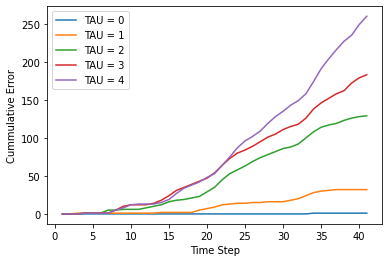

In [15]:
'''
More data processing
'''
# sum up the negative costs for the tower (get total expiration value)
cost_per_tau_over_time = [[] for i in range(TAU_MAX)]
for index,tau in enumerate(completed_states):
    sum_cost = 0
    for time_step in range(len(completed_states[0][0])):
        for tower in tau:
            for expiration in tower[time_step].time_vector:
                if expiration < 0:
#                     sum_cost -= expiration 
                    sum_cost +=1
        cost_per_tau_over_time[index].append(sum_cost)
cost_per_tau_over_time = cost_per_tau_over_time[:5]
'''
first plot:
cummulative expiration cost vs. time step
label with periods of high traffic and low traffic
do a line per tau
'''
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(completed_states[0][0]))]
for tau_num, tau in enumerate(cost_per_tau_over_time):
    plt.plot(x, tau, label = "TAU = " + str(tau_num))
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Cummulative Error')
plt.show()